In [ ]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################
#
# Wrangle Synthetic Medical Record Data
#
##########################################################################################

## Fetch data
Go here: https://drive.google.com/drive/folders/0B5Wu8z15TIbiLUhvcWxaMDJCRGs

Get this data set: 10000-Patients.zip

unzip it into the Data folder

In [1]:
import pandas as pd
import pylab as plt
import numpy as np
import datetime as dt

In [2]:
##################################################################################################################
#
# YouDo: Import each of the 4 files into its own data frame
#         (Hint:  they're tab-separated)


In [3]:
# 1) 

adm_core_pop = pd.read_csv('C:/Users/rache/Documents/GitHub/BIOS6644/Data/MedRecs/AdmissionsCorePopulatedTable.txt', sep='\t')

adm_diag_pop = pd.read_csv('C:/Users/rache/Documents/GitHub/BIOS6644/Data/MedRecs/AdmissionsDiagnosesCorePopulatedTable.txt', sep='\t')

lab_core_pop = pd.read_csv('C:/Users/rache/Documents/GitHub/BIOS6644/Data/MedRecs/LabsCorePopulatedTable.txt', sep='\t')

patient_core_pop = pd.read_csv('C:/Users/rache/Documents/GitHub/BIOS6644/Data/MedRecs/PatientCorePopulatedTable.txt', sep='\t')


In [4]:
adm_core_pop.head()

,PatientID,AdmissionID,AdmissionStartDate,AdmissionEndDate
0,43556DC2-BCFC-45A8-84C3-1D3E4A11B02F,1,1974-07-26 15:05:30.333,1974-07-30 22:27:44.987
1,43556DC2-BCFC-45A8-84C3-1D3E4A11B02F,2,1983-11-12 03:34:39.083,1983-11-30 19:05:54.040
2,43556DC2-BCFC-45A8-84C3-1D3E4A11B02F,3,1998-09-28 12:08:17.843,1998-10-08 12:56:31.233
3,43556DC2-BCFC-45A8-84C3-1D3E4A11B02F,4,1999-04-03 01:49:32.610,1999-04-09 14:04:29.210
4,43556DC2-BCFC-45A8-84C3-1D3E4A11B02F,5,2001-11-26 03:07:07.303,2001-12-01 08:22:03.783


In [5]:
##################################################################################################################
#
# YouDo: Notice that there are many columns with dates, but pandas assumed they're strings
#
#        1) use the pd.to_datetime() method to transform all of the time columns to have type datetime
#            # stretch goal:  do it in a loop based on the string 'Date' appearing in the column name
#
# Show the type


adm_core_pop.columns

Index(['PatientID', 'AdmissionID', 'AdmissionStartDate', 'AdmissionEndDate'], dtype='object')

In [6]:

# 1) 

# hmmm
test = [pd.to_datetime(col) for col in adm_core_pop.columns if 'Date' in col]

## Instructor comment:
## "col" is the name of the column, not the data of the column
## Something like this might have the desired effect
## test = [pd.to_datetime(adm_core_pop[col]) for col in adm_core_pop.columns if 'Date' in col]

ValueError: ('Unknown string format:', 'AdmissionStartDate')

In [7]:
# one column at a time:
adm_core_pop["AdmissionStartDate"] = pd.to_datetime(adm_core_pop["AdmissionStartDate"])
adm_core_pop["AdmissionEndDate"] = pd.to_datetime(adm_core_pop["AdmissionEndDate"])

lab_core_pop["LabDateTime"] = pd.to_datetime(lab_core_pop["LabDateTime"])


In [8]:
# As is typical in complex data sets, informtion about each patient is broken up into several different
# tables, cross-referenced by a patient id
##################################################################################################################
#
# YouDo: Print out the records from each of the four tables for patient number
# '327A3C2F-B234-400B-B994-833073C014C0'



In [9]:
adm_core_pop[adm_core_pop.PatientID  == "327A3C2F-B234-400B-B994-833073C014C0"]

,PatientID,AdmissionID,AdmissionStartDate,AdmissionEndDate
15184,327A3C2F-B234-400B-B994-833073C014C0,1,1985-05-02 03:28:04.047,1985-05-07 02:33:18.970
15185,327A3C2F-B234-400B-B994-833073C014C0,2,1993-01-26 22:14:39.247,1993-02-01 22:25:06.137
15186,327A3C2F-B234-400B-B994-833073C014C0,3,1998-10-26 15:55:32.827,1998-11-03 02:48:41.307
15187,327A3C2F-B234-400B-B994-833073C014C0,4,2005-11-03 07:41:26.787,2005-11-11 08:24:10.020
15188,327A3C2F-B234-400B-B994-833073C014C0,5,2011-11-17 20:08:57.343,2011-12-04 19:19:03.410


In [10]:
adm_diag_pop[adm_diag_pop.PatientID  == "327A3C2F-B234-400B-B994-833073C014C0"]

,PatientID,AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
14737,327A3C2F-B234-400B-B994-833073C014C0,1,Z13.88,Encounter for screening for disorder due to ex...
14738,327A3C2F-B234-400B-B994-833073C014C0,2,M06.272,"Rheumatoid bursitis, left ankle and foot"
14739,327A3C2F-B234-400B-B994-833073C014C0,3,G54.4,"Lumbosacral root disorders, not elsewhere clas..."
14740,327A3C2F-B234-400B-B994-833073C014C0,4,C72.0,Malignant neoplasm of spinal cord
14741,327A3C2F-B234-400B-B994-833073C014C0,5,I24.0,Acute coronary thrombosis not resulting in myo...


In [11]:
# print head since it's so long...
lab_core_pop[lab_core_pop.PatientID  == "327A3C2F-B234-400B-B994-833073C014C0"].head()

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
5846797,327A3C2F-B234-400B-B994-833073C014C0,1,URINALYSIS: WHITE BLOOD CELLS,1.8,wbc/hpf,1985-05-02 09:12:26.550
5846798,327A3C2F-B234-400B-B994-833073C014C0,1,CBC: RED BLOOD CELL COUNT,4.8,m/cumm,1985-05-02 18:05:24.573
5846799,327A3C2F-B234-400B-B994-833073C014C0,1,CBC: HEMATOCRIT,30.7,%,1985-05-02 09:48:19.407
5846800,327A3C2F-B234-400B-B994-833073C014C0,1,URINALYSIS: SPECIFIC GRAVITY,1.0,no unit,1985-05-02 14:57:08.487
5846801,327A3C2F-B234-400B-B994-833073C014C0,1,CBC: MEAN CORPUSCULAR VOLUME,75.8,fl,1985-05-02 15:37:22.123


In [12]:
patient_core_pop[patient_core_pop.PatientID  == "327A3C2F-B234-400B-B994-833073C014C0"]

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty
8097,327A3C2F-B234-400B-B994-833073C014C0,Female,1962-06-14 05:01:30.953,Asian,Single,English,18.96


In [13]:
# Holy cow!  this patient has 1203 lab results in her record
# This is synthetic data, so it's bound to have weird things.  Is that normal in this data?
##################################################################################################################
#
# You do:
#   1) Compute the average & standard deviation of number of labs per patient.
#         hint:  Consider pd.groupby()
#
#   2) Compute a list of each lab and how many orders for that lab are in the data frame
#         

In [14]:
#1)  
lab_counts = lab_core_pop.groupby(["PatientID"]).size().reset_index(name='counts')
lab_counts["counts"].mean()

1072.6505

In [15]:
lab_counts["counts"].std()

522.6801350750865

In [16]:
# 2)
lab_core_pop.groupby(["LabName"]).size().head()

LabName
CBC: ABSOLUTE LYMPHOCYTES    306883
CBC: ABSOLUTE NEUTROPHILS    306215
CBC: BASOPHILS               305953
CBC: EOSINOPHILS             306886
CBC: HEMATOCRIT              306557
dtype: int64

In [17]:
# each patient is getting the same lab done many times
lab_core_pop.groupby(["PatientID", "LabName"]).size().head()

PatientID                             LabName                  
0002C021-6DDD-433A-B9A0-2D26DF0C6AC0  CBC: ABSOLUTE LYMPHOCYTES    57
                                      CBC: ABSOLUTE NEUTROPHILS    53
                                      CBC: BASOPHILS               55
                                      CBC: EOSINOPHILS             60
                                      CBC: HEMATOCRIT              57
dtype: int64

In [18]:
# It seems that this data set has the same patient getting the same labs perhaps dozens of times.
# Lets make a visualization of one of the time vs. one of the lab values for a specific patient.
##################################################################################################################
#
# You do:
#   1) Find the patient/lab combination with the most labs taken
#   2) For the most-measured patient/lab combination, make a time vs lab-value plot

In [19]:
# 1) 
pat_lab_combo = lab_core_pop.groupby(["PatientID", "LabName"]).size().reset_index(name='counts')

test = pat_lab_combo.sort_values('counts', ascending=False)
test.head()

# yes
#assert biggest_value == 117

,PatientID,LabName,counts
83844,3D33CC75-3EF0-49B5-9524-B4E8A7C08F25,METABOLIC: BILI TOTAL,117
83826,3D33CC75-3EF0-49B5-9524-B4E8A7C08F25,CBC: EOSINOPHILS,116
83835,3D33CC75-3EF0-49B5-9524-B4E8A7C08F25,CBC: PLATELET COUNT,115
83846,3D33CC75-3EF0-49B5-9524-B4E8A7C08F25,METABOLIC: CALCIUM,115
83848,3D33CC75-3EF0-49B5-9524-B4E8A7C08F25,METABOLIC: CHLORIDE,115


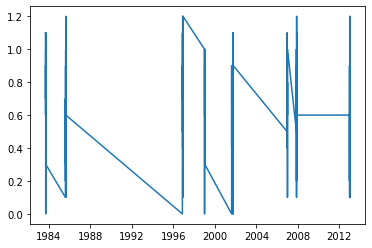

In [24]:
# 2) 
import matplotlib.pyplot as mplt

lab_sub = lab_core_pop[lab_core_pop.PatientID  == "3D33CC75-3EF0-49B5-9524-B4E8A7C08F25"]
lab_sub = lab_sub[lab_sub.LabName == "METABOLIC: BILI TOTAL"]

mplt.plot(lab_sub["LabDateTime"], lab_sub["LabValue"])

In [28]:
# print all bili lab results from 1985
lab_range = (lab_sub['LabDateTime'] > '1985-01-01') & (lab_sub['LabDateTime'] <= '1985-12-31')
print(lab_sub.loc[lab_range])

                                    PatientID  AdmissionID  \
5552246  3D33CC75-3EF0-49B5-9524-B4E8A7C08F25            2   
5552285  3D33CC75-3EF0-49B5-9524-B4E8A7C08F25            2   
5552307  3D33CC75-3EF0-49B5-9524-B4E8A7C08F25            2   
5552362  3D33CC75-3EF0-49B5-9524-B4E8A7C08F25            2   
5552409  3D33CC75-3EF0-49B5-9524-B4E8A7C08F25            2   
5552458  3D33CC75-3EF0-49B5-9524-B4E8A7C08F25            2   
5552469  3D33CC75-3EF0-49B5-9524-B4E8A7C08F25            2   
5552512  3D33CC75-3EF0-49B5-9524-B4E8A7C08F25            2   
5552544  3D33CC75-3EF0-49B5-9524-B4E8A7C08F25            2   
5552581  3D33CC75-3EF0-49B5-9524-B4E8A7C08F25            2   
5552602  3D33CC75-3EF0-49B5-9524-B4E8A7C08F25            2   
5552637  3D33CC75-3EF0-49B5-9524-B4E8A7C08F25            2   
5552658  3D33CC75-3EF0-49B5-9524-B4E8A7C08F25            2   

                       LabName  LabValue LabUnits             LabDateTime  
5552246  METABOLIC: BILI TOTAL       0.1    mg/dL 1985-

In [ ]:
##################################################################################################################
#
# You do:
#   Closely inspect the plot you made.  
#
# 1) In order to compare this to another data set, your PI wants to know what the lab value was on August 6, 1985.  
#    What would you tell him/her (including all caveats)?
#
# 2) How about the value for January 19, 1992?

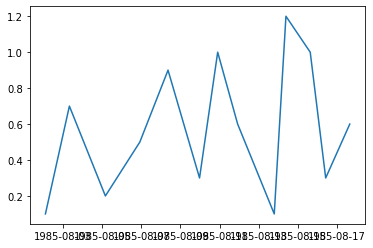

In [30]:

# 1) The Bilirubin value for 8/6 was 0.5. However, this person appears to have been hospitalized
#    from 8/2-8/17 and had bilirubin run most days. Below I printed the bilirubin values from that time.
#    The values vary greatly, so perhaps taking the average from that time would be more informative than
#    Taking a single value

sub_sub = lab_sub.loc[lab_range]
mplt.plot(sub_sub["LabDateTime"], sub_sub["LabValue"])

In [31]:
# 2) 

# print all bili lab results from 1992
lab_range = (lab_sub['LabDateTime'] > '1992-01-01') & (lab_sub['LabDateTime'] <= '1992-12-31')
print(lab_sub.loc[lab_range])

# There was no bilirubin tested on January 19, 1992. Though we have a line moving through that point in our graph,
# there is no actual value collected at that time

Empty DataFrame
Columns: [PatientID, AdmissionID, LabName, LabValue, LabUnits, LabDateTime]
Index: []
